# Malaria Cell Exploratory Data Analysis

## Initial Data Exploration

Importing the necessary libraries and loading the data such as the images and the labels.

In [14]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [15]:
# Load the malaria dataset from TFDS
dataset, info = tfds.load('malaria', split='train', with_info=True)

Dataset information from tensorflow datasets is displayed below.

In [16]:
# Display dataset information
print(info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

Visualizing the tensrflow dataset data.

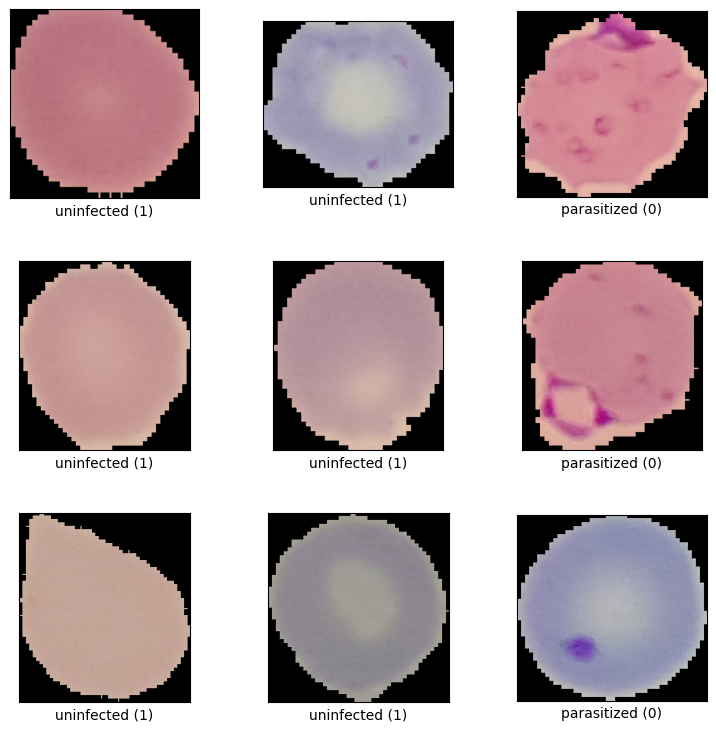

In [17]:
# Display dataset samples
fig = tfds.show_examples(dataset, info)

# Explore class distribution
num_infected = 0
num_uninfected = 0
for example in dataset:
    label = example['label'].numpy()
    if label == 0:
        num_infected += 1
    elif label == 1:
        num_uninfected += 1

Class distribution of uninfected and parasitized cells is displayed. The data is balanced.

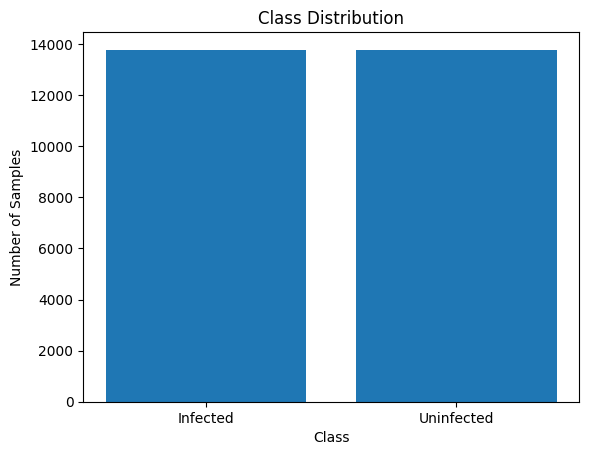

In [18]:
# Plot class distribution
plt.bar(['Infected', 'Uninfected'], [num_infected, num_uninfected])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

Visualizing the images of the cells along with their labels.

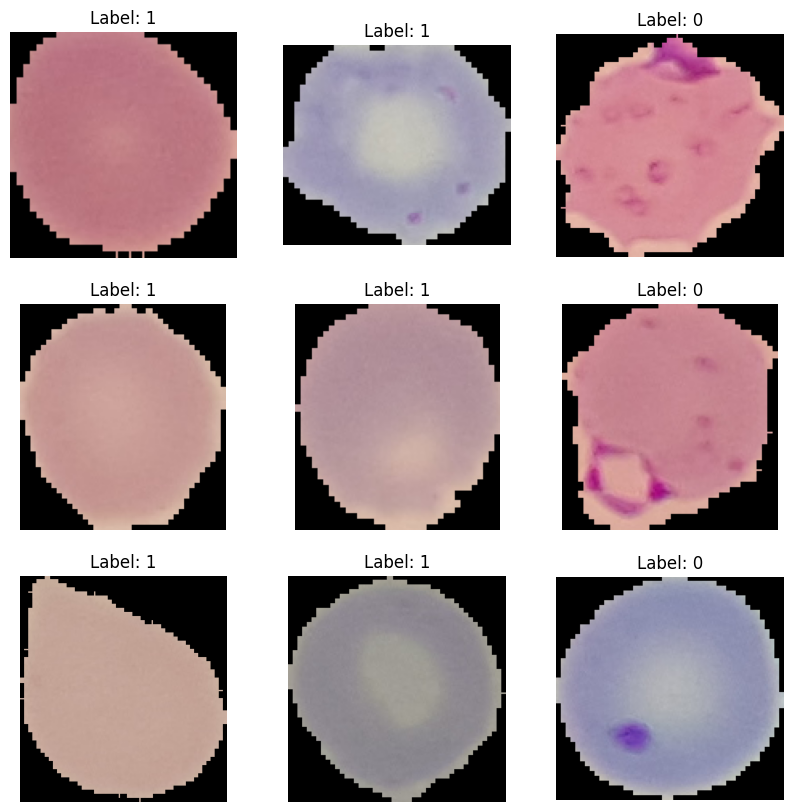

In [19]:
# Display sample images
plt.figure(figsize=(10, 10))

# Display 9 images
for i, example in enumerate(dataset.take(9)):
    image = example['image']
    label = example['label']
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')
plt.show()

## Image Statistics

Statistics of the images such as the mean, standard deviation, minimum and maximum values of the images. This is done to get a better understanding of the images.

In [20]:
# Function to compute image statistics
def compute_image_statistics(images):
    """
    Computes the minimum, maximum, mean, and standard deviation of pixel values in a set of images.

    Args:
        images (numpy.ndarray): A numpy array containing the images.

    Returns:
        tuple: A tuple containing the minimum pixel value, maximum pixel value, mean pixel value, and standard deviation of pixel values.
    """
    images = images.numpy()
    min_pixel_value = np.min(images)
    max_pixel_value = np.max(images)
    mean_pixel_value = np.mean(images)
    std_pixel_value = np.std(images)
    return min_pixel_value, max_pixel_value, mean_pixel_value, std_pixel_value

In [21]:
# Collect image statistics
image_statistics = []
for example in dataset.take(1000):  # Adjust the number of samples for computation speed
    image = example['image']
    image_statistics.append(compute_image_statistics(image))

In [22]:
# Display image statistics
min_vals, max_vals, mean_vals, std_vals = zip(*image_statistics)
print(f'Min Pixel Value: {np.min(min_vals)}')
print(f'Max Pixel Value: {np.max(max_vals)}')
print(f'Mean Pixel Value: {np.mean(mean_vals)}')
print(f'Std Pixel Value: {np.mean(std_vals)}')

Min Pixel Value: 0
Max Pixel Value: 254
Mean Pixel Value: 119.29090635034383
Std Pixel Value: 77.37474595199356


## Image Size Distribution

Distribution of the image sizes is displayed. The images are of different sizes. Distribution of the image sizes is displayed.

In [23]:
# Analyze image size distribution
image_sizes = []

# Collect image sizes
for example in dataset:
    image = example['image']
    height, width, _ = image.shape
    image_sizes.append((height, width))

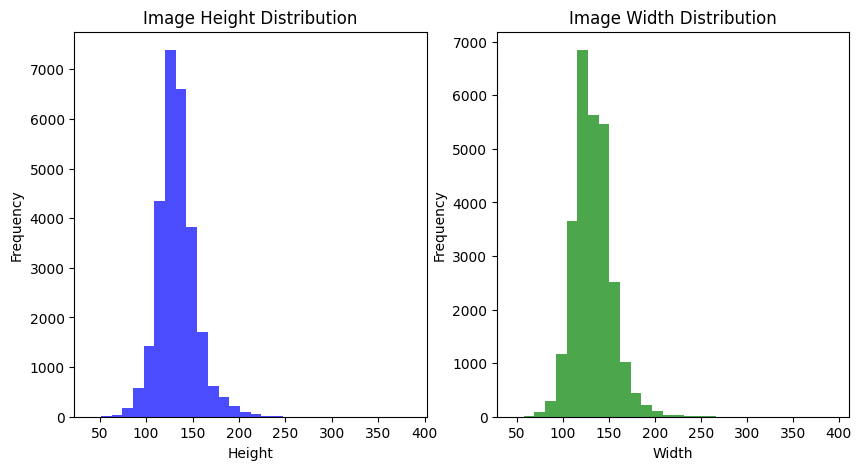

In [24]:
# Plot image size distribution
heights, widths = zip(*image_sizes)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=30, color='blue', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=30, color='green', alpha=0.7)
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.show()